https://chat.qwen.ai/s/56738b44-0f16-44fb-ab60-a05217f54b34?fev=0.1.31

In [23]:
import pandas as pd
from scipy import stats
import numpy as np

In [24]:
df = pd.read_csv("HardwareMonitoring.csv")
df.head(3)

,GPU,Application,Timestamp,GPU usage (%),Memory usage (MB),Power (W),CPU usage (%),RAM usage (MB),Framerate (FPS),Frametime (ms),Framerate Min (FPS),Framerate Avg (FPS),Framerate Max (FPS),Framerate 1% Low (FPS),Framerate 0.1% Low (FPS)
0,NVIDIA GeForce RTX 4060,Hogwart Legacy,4/1/2026 14:34,69,7484.582,96.265,56.202,28611,75.9,86.951,74.7,75.1,81.1,11.5,11.5
1,NVIDIA GeForce RTX 4060,Hogwart Legacy,4/1/2026 14:34,76,7463.457,97.348,69.957,28720,65.6,52.007,61.5,70.4,81.1,11.5,11.5
2,NVIDIA GeForce RTX 4060,Hogwart Legacy,4/1/2026 14:34,85,7463.520,100.158,63.512,28748,76.6,39.261,61.5,72.7,81.1,11.5,11.5


In [25]:
# แยกเฉพาะคอลัมน์ที่เป็นตัวเลข (numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# สร้าง DataFrame สำหรับผลลัพธ์
results = []


In [26]:
for col in numeric_cols:
    data = df[col].dropna()  # ลบค่า NaN ออก
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=1)  # sample standard deviation
    sem = std / np.sqrt(n)  # standard error of the mean
    
    confidence = 0.95
    alpha = 1 - confidence

    # ถ้าอยากใช้ t-distribution สำหรับ CI (แม่นยำกว่าสำหรับ n น้อย)
    #t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
    #margin_of_error = t_critical * sem

    z_critical = stats.norm.ppf(1 - alpha/2)
    margin_of_error = z_critical * sem

    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    results.append({
        'Column': col,
        'Mean': round(mean, 4),
        'SD': round(std, 4),
        'CI Lower': round(ci_lower, 4),
        'CI Upper': round(ci_upper, 4),
        'Sample Size (n)': n
    })

In [27]:
# แสดงผลลัพธ์ในรูปแบบ DataFrame
results_df = pd.DataFrame(results)
print("📊 Summary Statistics with 95% Confidence Intervals:")
print(results_df.to_string(index=False))

📊 Summary Statistics with 95% Confidence Intervals:
                  Column       Mean       SD   CI Lower   CI Upper  Sample Size (n)
           GPU usage (%)    84.0000   8.4390    82.8531    85.1469              208
       Memory usage (MB)  7435.3062  40.1561  7429.8490  7440.7634              208
               Power (W)    96.6482  12.5276    94.9457    98.3507              208
           CPU usage (%)    54.5369   8.2351    53.4178    55.6560              208
          RAM usage (MB) 29105.7981 646.0013 29018.0071 29193.5890              208
         Framerate (FPS)    62.6442  14.3302    60.6968    64.5917              208
          Frametime (ms)    57.7397  21.7385    54.7854    60.6939              208
     Framerate Min (FPS)    29.2236  11.1222    27.7121    30.7351              208
     Framerate Avg (FPS)    57.7202   5.1690    57.0177    58.4227              208
     Framerate Max (FPS)    82.0284   1.0978    81.8792    82.1776              208
  Framerate 1% Low (FPS)

In [28]:
# คำนวณค่าความกว้างของ CI (half-width)
results_df['CI Half-Width'] = (results_df['CI Upper'] - results_df['CI Lower']) / 2

# สร้างคอลัมน์ใหม่ที่แสดง Mean ± CI
results_df['CI'] = results_df['Mean'].round(4).astype(str) + ' ± ' + results_df['CI Half-Width'].round(4).astype(str)

# # ลบคอลัมน์ที่ไม่จำเป็นออก (ถ้าต้องการ)
# results_df = results_df[['Column', 'Mean ± CI', 'SD', 'Sample Size (n)']]

# แสดงผลลัพธ์
print("📊 Summary Statistics with Mean ± CI:")
print(results_df.to_string(index=False))

📊 Summary Statistics with Mean ± CI:
                  Column       Mean       SD   CI Lower   CI Upper  Sample Size (n)  CI Half-Width                  CI
           GPU usage (%)    84.0000   8.4390    82.8531    85.1469              208        1.14690       84.0 ± 1.1469
       Memory usage (MB)  7435.3062  40.1561  7429.8490  7440.7634              208        5.45720  7435.3062 ± 5.4572
               Power (W)    96.6482  12.5276    94.9457    98.3507              208        1.70250    96.6482 ± 1.7025
           CPU usage (%)    54.5369   8.2351    53.4178    55.6560              208        1.11910    54.5369 ± 1.1191
          RAM usage (MB) 29105.7981 646.0013 29018.0071 29193.5890              208       87.79095 29105.7981 ± 87.791
         Framerate (FPS)    62.6442  14.3302    60.6968    64.5917              208        1.94745    62.6442 ± 1.9474
          Frametime (ms)    57.7397  21.7385    54.7854    60.6939              208        2.95425    57.7397 ± 2.9542
     Framer

In [29]:
# ระบุลำดับคอลัมน์ที่ต้องการ
column_order = ['Column', 'Mean', 'SD', 'CI','CI Upper','CI Lower', 'Sample Size (n)']

# จัดลำดับคอลัมน์ใหม่
results_df = results_df[column_order]

# แสดงผล
print("📊 ผลลัพธ์ที่จัดลำดับแล้ว:")
print(results_df.to_string(index=False))

📊 ผลลัพธ์ที่จัดลำดับแล้ว:
                  Column       Mean       SD                  CI   CI Upper   CI Lower  Sample Size (n)
           GPU usage (%)    84.0000   8.4390       84.0 ± 1.1469    85.1469    82.8531              208
       Memory usage (MB)  7435.3062  40.1561  7435.3062 ± 5.4572  7440.7634  7429.8490              208
               Power (W)    96.6482  12.5276    96.6482 ± 1.7025    98.3507    94.9457              208
           CPU usage (%)    54.5369   8.2351    54.5369 ± 1.1191    55.6560    53.4178              208
          RAM usage (MB) 29105.7981 646.0013 29105.7981 ± 87.791 29193.5890 29018.0071              208
         Framerate (FPS)    62.6442  14.3302    62.6442 ± 1.9474    64.5917    60.6968              208
          Frametime (ms)    57.7397  21.7385    57.7397 ± 2.9542    60.6939    54.7854              208
     Framerate Min (FPS)    29.2236  11.1222    29.2236 ± 1.5115    30.7351    27.7121              208
     Framerate Avg (FPS)    57.7202   

In [30]:
# บันทึกเป็นไฟล์ CSV
results_df.to_csv('summary_statistics_with_ci2.csv', index=False, encoding='utf-8-sig')

print("✅ บันทึกไฟล์ 'summary_statistics_with_ci.csv' เรียบร้อยแล้ว!")

✅ บันทึกไฟล์ 'summary_statistics_with_ci.csv' เรียบร้อยแล้ว!


In [31]:
# หา Outlier

numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # หาค่า Outlier
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # บันทึกผล
    outliers_summary.append({
        'Column': col,
        'Q1': round(Q1, 4),
        'Q3': round(Q3, 4),
        'IQR': round(IQR, 4),
        'Lower Bound': round(lower_bound, 4),
        'Upper Bound': round(upper_bound, 4),
        'Number of Outliers': len(outliers),
        'Outlier Values': sorted(outliers.tolist()) if len(outliers) > 0 else []
    })

# สร้าง DataFrame ผลลัพธ์
outliers_df = pd.DataFrame(outliers_summary)

print("📊 Outlier Detection using IQR Method:")
print(outliers_df.to_string(index=False))

📊 Outlier Detection using IQR Method:
                  Column         Q1         Q3       IQR  Lower Bound  Upper Bound  Number of Outliers                                                                                                                                                                                                                                                                                                     Outlier Values
           GPU usage (%)    79.0000    89.0000   10.0000      64.0000     104.0000                   4                                                                                                                                                                                                                                                                                                   [58, 61, 61, 61]
       Memory usage (MB)  7414.5058  7465.0868   50.5810    7338.6342    7540.9582                   4                                        

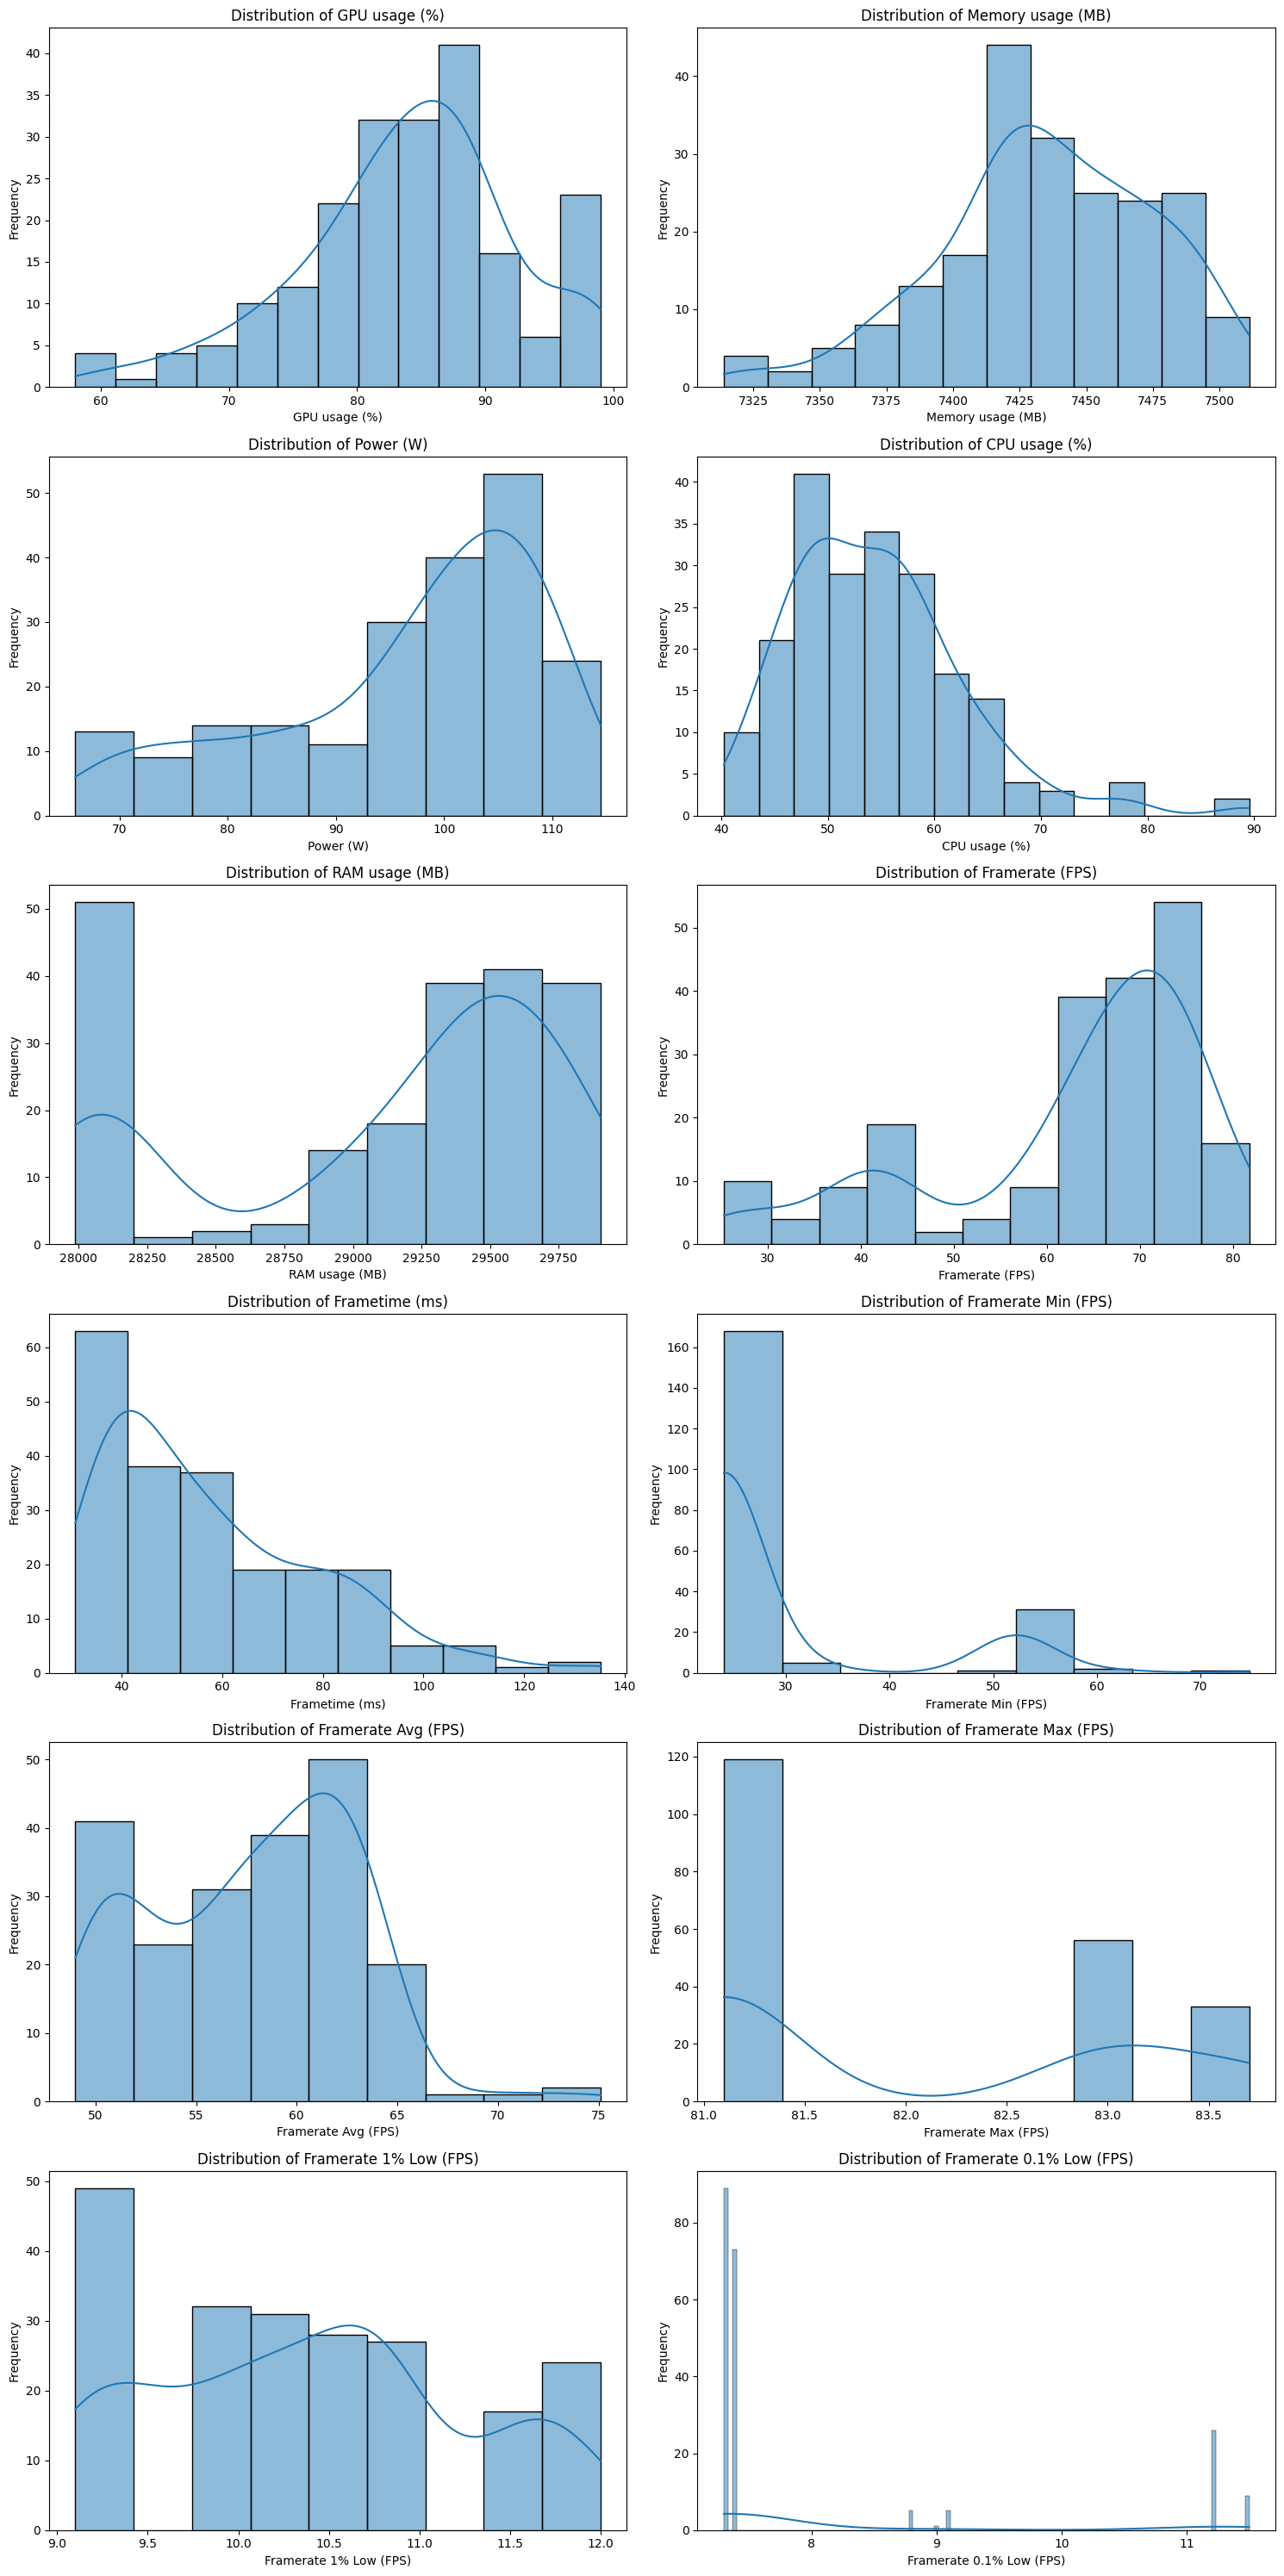

In [33]:
"""Distribution Plot"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# สมมุติว่า df คือ DataFrame ของคุณ
# แยกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = df.select_dtypes(include=[np.number]).columns

# กำหนดขนาดของกราฟ (optional)
plt.rcParams['figure.figsize'] = [12, 8]

# จำนวนคอลัมน์ที่จะ plot
n_cols = len(numeric_cols)

# คำนวณจำนวนแถวและคอลัมน์ของ subplot (สมมุติ plot 2 คอลัมน์ต่อแถว)
n_rows = int(np.ceil(n_cols / 2))

# สร้าง subplot
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# ปิดแกนที่ไม่ได้ใช้ (ถ้ามี)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

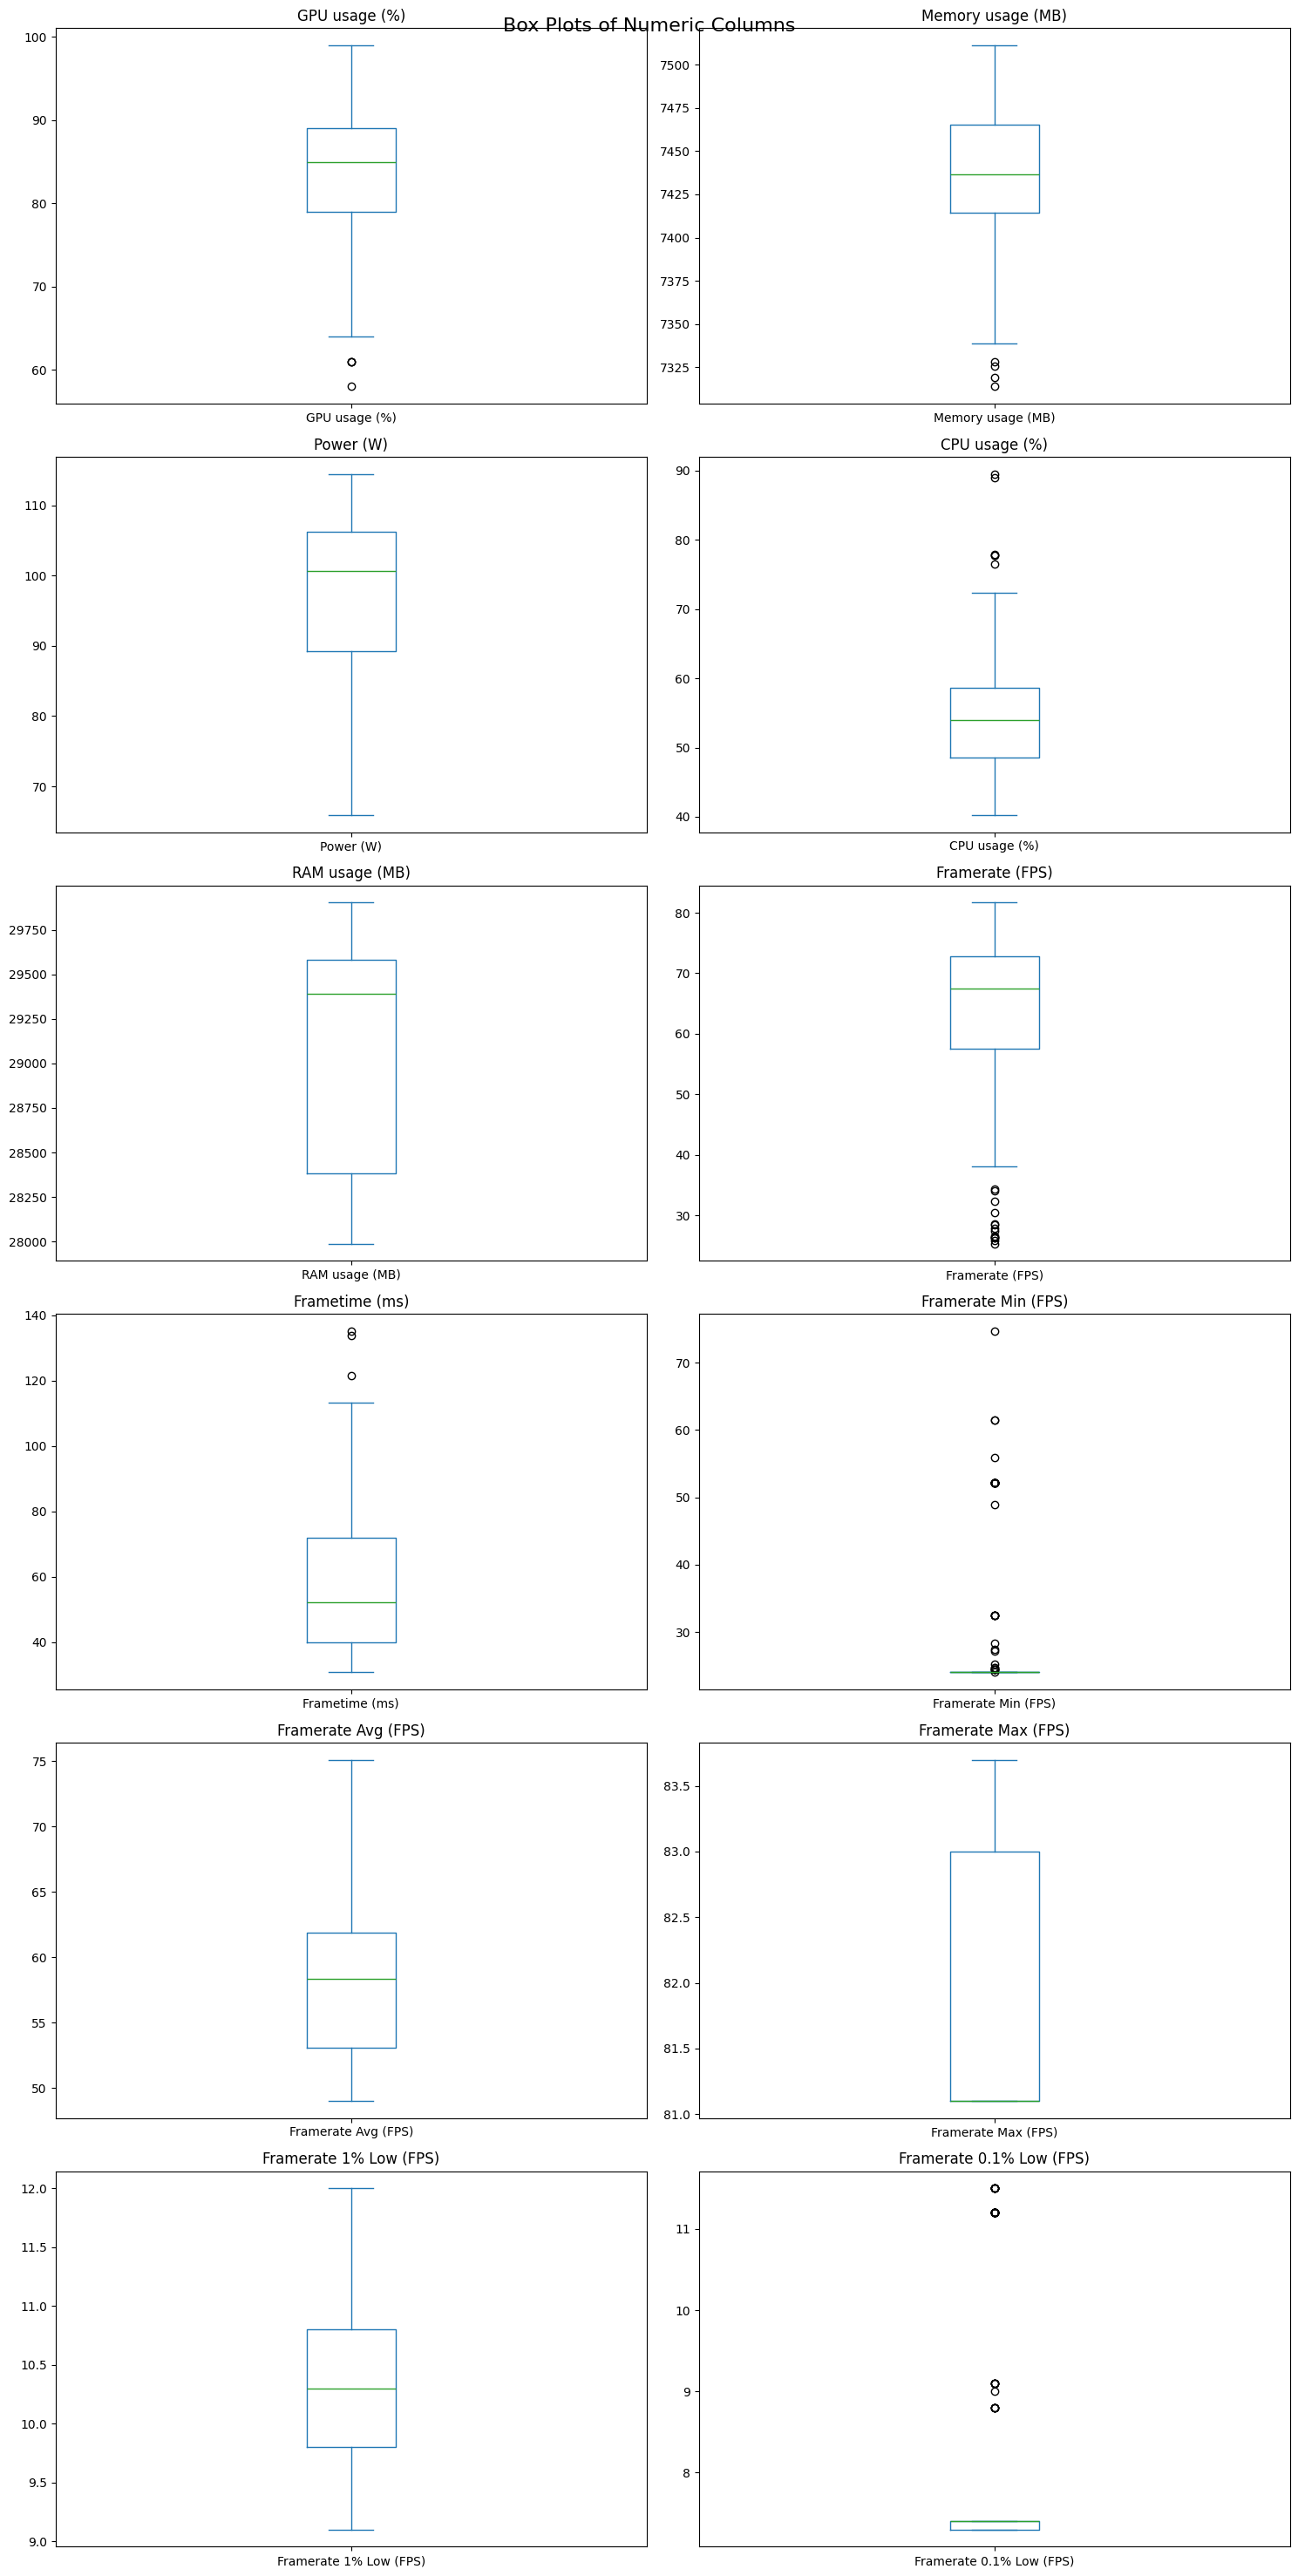

In [34]:
# สร้าง Box Plot สำหรับทุกคอลัมน์
df[numeric_cols].plot(
    kind='box',
    subplots=True,
    layout=(n_rows, 2),
    figsize=(15, 5 * n_rows),
    title=[col for col in numeric_cols]
)
plt.suptitle("Box Plots of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# บันทึกเป็นไฟล์ภาพ
fig.savefig('distribution_plots.png', dpi=300, bbox_inches='tight')
print("✅ บันทึกกราฟเป็นไฟล์ 'distribution_plots.png' เรียบร้อยแล้ว!")